<a href="https://www.kaggle.com/code/lalit7881/decision-fatigue-prediction-logistic-reg-100?scriptVersionId=294577345" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-decision-fatigue-behavioral-dataset/human_decision_fatigue_dataset.csv


## Import dataset

In [2]:
# Load the dataset
file_path = "/kaggle/input/human-decision-fatigue-behavioral-dataset/human_decision_fatigue_dataset.csv"
df = pd.read_csv(file_path)

# Display basic info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())
print(df.info())
print(df.describe())

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())


Dataset Shape: (25000, 13)
Columns: Index(['Hours_Awake', 'Decisions_Made', 'Task_Switches',
       'Avg_Decision_Time_sec', 'Sleep_Hours_Last_Night', 'Time_of_Day',
       'Caffeine_Intake_Cups', 'Stress_Level_1_10', 'Error_Rate',
       'Cognitive_Load_Score', 'Decision_Fatigue_Score', 'Fatigue_Level',
       'System_Recommendation'],
      dtype='object')
   Hours_Awake  Decisions_Made  Task_Switches  Avg_Decision_Time_sec  \
0            7              28              7                   2.30   
1           15              77             22                   3.65   
2           11              57             23                   3.67   
3            8              39             10                   2.39   
4            7              46             16                   3.05   

   Sleep_Hours_Last_Night Time_of_Day  Caffeine_Intake_Cups  \
0                     5.8     Evening                     0   
1                     4.5   Afternoon                     3   
2                

In [3]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
Hours_Awake               0
Decisions_Made            0
Task_Switches             0
Avg_Decision_Time_sec     0
Sleep_Hours_Last_Night    0
Time_of_Day               0
Caffeine_Intake_Cups      0
Stress_Level_1_10         0
Error_Rate                0
Cognitive_Load_Score      0
Decision_Fatigue_Score    0
Fatigue_Level             0
System_Recommendation     0
dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + "_encoded"] = le.fit_transform(df[col])
    le_dict[col] = le  # store for future inverse transform
    print(f"Encoded column: {col} -> {col + '_encoded'}")

Encoded column: Time_of_Day -> Time_of_Day_encoded
Encoded column: Fatigue_Level -> Fatigue_Level_encoded
Encoded column: System_Recommendation -> System_Recommendation_encoded


In [6]:
if "Decisions_Made" in df.columns and "Hours_Awake" in df.columns:
    df["Decisions_Per_Hour"] = df["Decisions_Made"] / (df["Hours_Awake"] + 1e-5)


In [7]:
if "Task_Switches" in df.columns and "Hours_Awake" in df.columns:
    df["Task_Switch_Rate"] = df["Task_Switches"] / (df["Hours_Awake"] + 1e-5)

In [8]:
scaler = StandardScaler()
numeric_features = numeric_cols + ["Decisions_Per_Hour", "Task_Switch_Rate"] if "Decisions_Per_Hour" in df.columns else numeric_cols
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

In [9]:
print("Final DataFrame with last columns:")
print(df_scaled.tail())

Final DataFrame with last columns:
       Hours_Awake  Decisions_Made  Task_Switches  Avg_Decision_Time_sec  \
24995     0.387931        0.061181       0.161536              -1.080329   
24996    -1.438370       -1.266370      -1.129328              -0.507461   
24997    -1.641293       -1.695871      -1.481381              -0.846939   
24998    -0.829603       -0.680685      -0.307869               0.606449   
24999    -0.220836       -0.055955      -0.190517               0.351841   

       Sleep_Hours_Last_Night Time_of_Day  Caffeine_Intake_Cups  \
24995               -0.705170   Afternoon             -0.627241   
24996                0.461207   Afternoon             -0.627241   
24997                0.999534       Night             -0.627241   
24998               -0.166842   Afternoon             -0.627241   
24999                0.192043   Afternoon              0.770916   

       Stress_Level_1_10  Error_Rate  Cognitive_Load_Score  \
24995           0.900306   -0.554813       

In [10]:
df_scaled.to_csv("human_decision_fatigue_processed.csv", index=False)
print("Processed dataset saved.")

Processed dataset saved.


In [11]:
df.columns

Index(['Hours_Awake', 'Decisions_Made', 'Task_Switches',
       'Avg_Decision_Time_sec', 'Sleep_Hours_Last_Night', 'Time_of_Day',
       'Caffeine_Intake_Cups', 'Stress_Level_1_10', 'Error_Rate',
       'Cognitive_Load_Score', 'Decision_Fatigue_Score', 'Fatigue_Level',
       'System_Recommendation', 'Time_of_Day_encoded', 'Fatigue_Level_encoded',
       'System_Recommendation_encoded', 'Decisions_Per_Hour',
       'Task_Switch_Rate'],
      dtype='object')

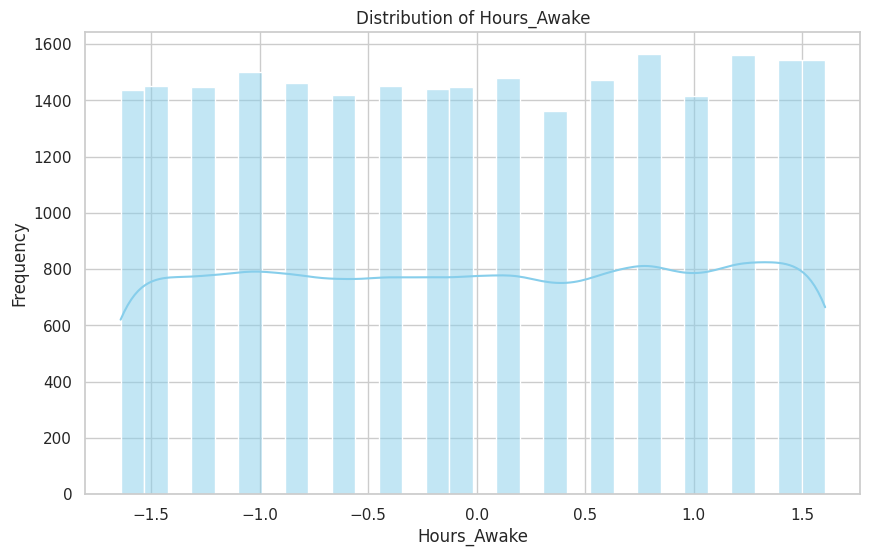

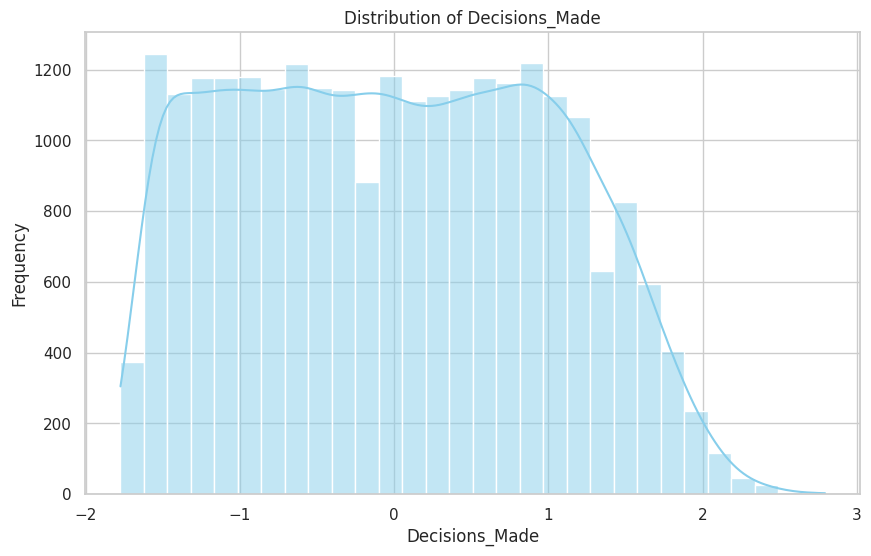

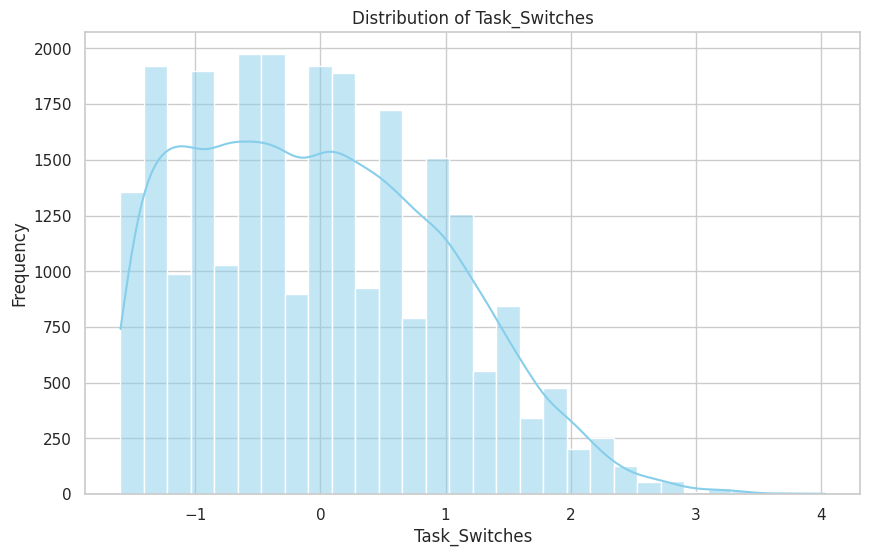

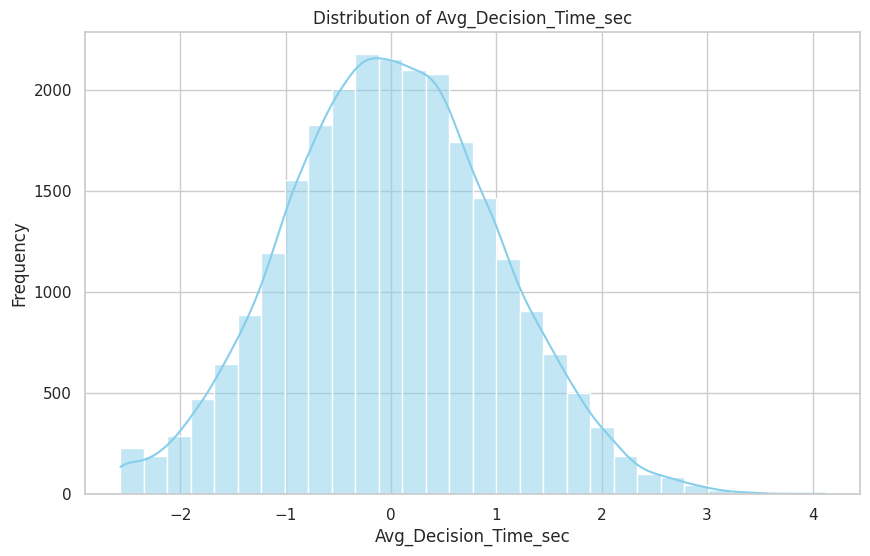

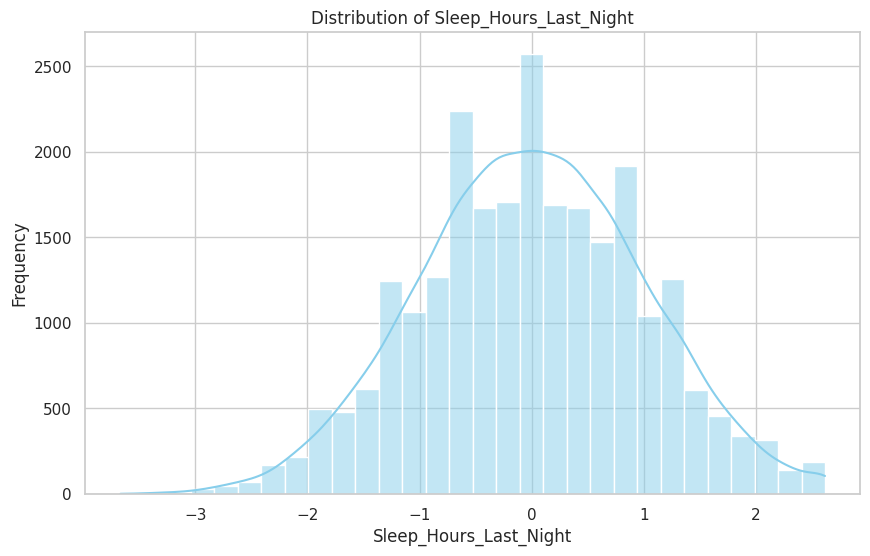

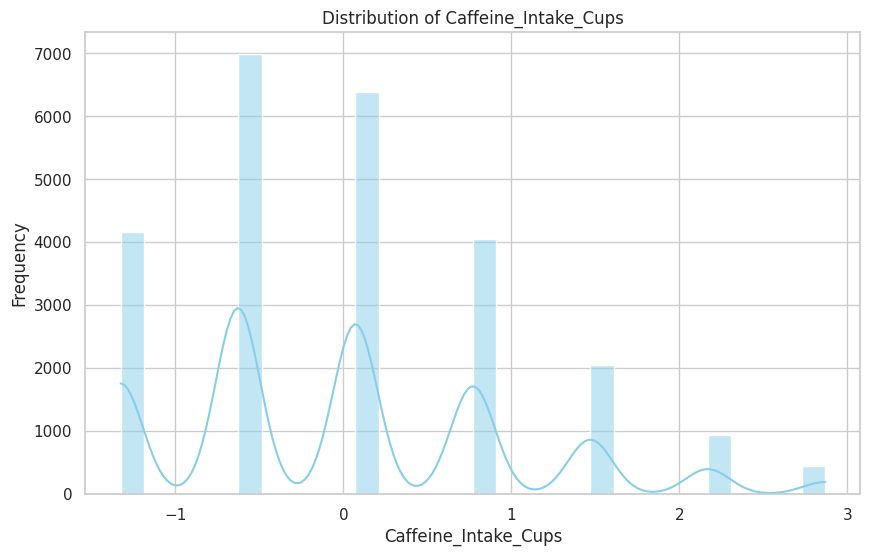

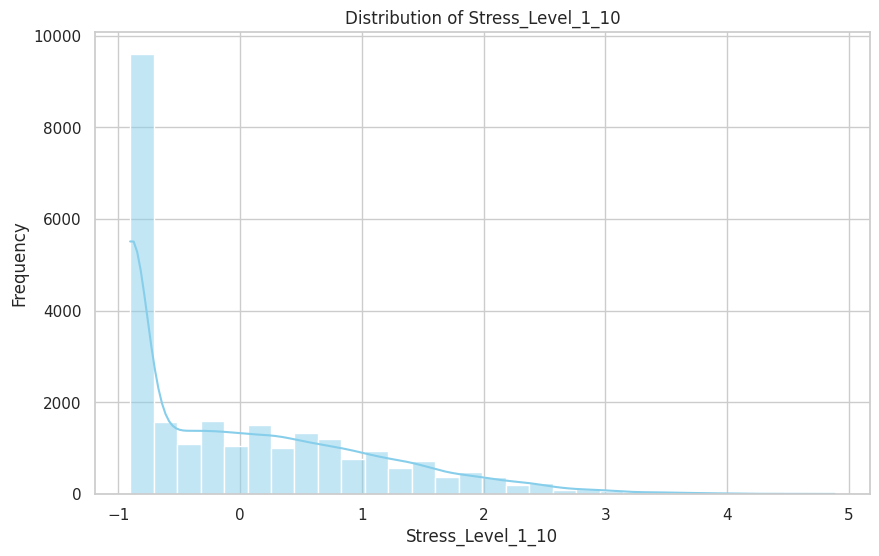

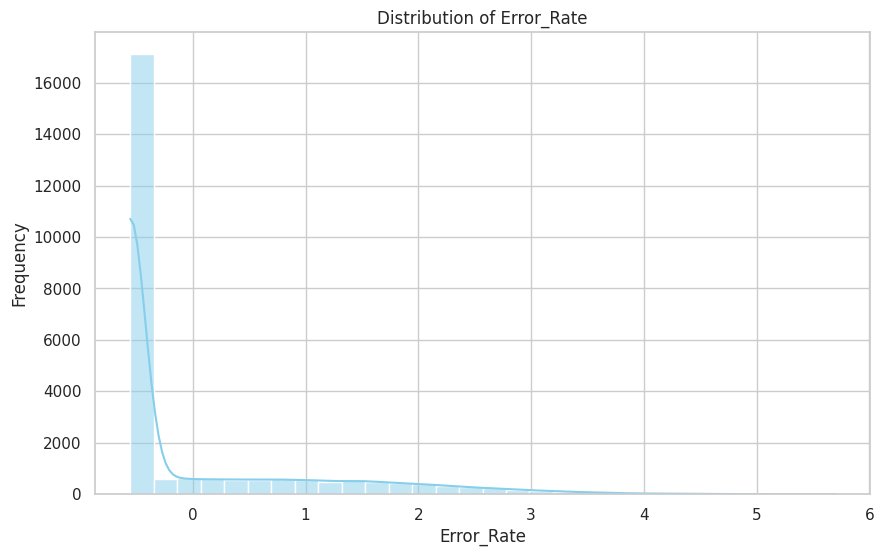

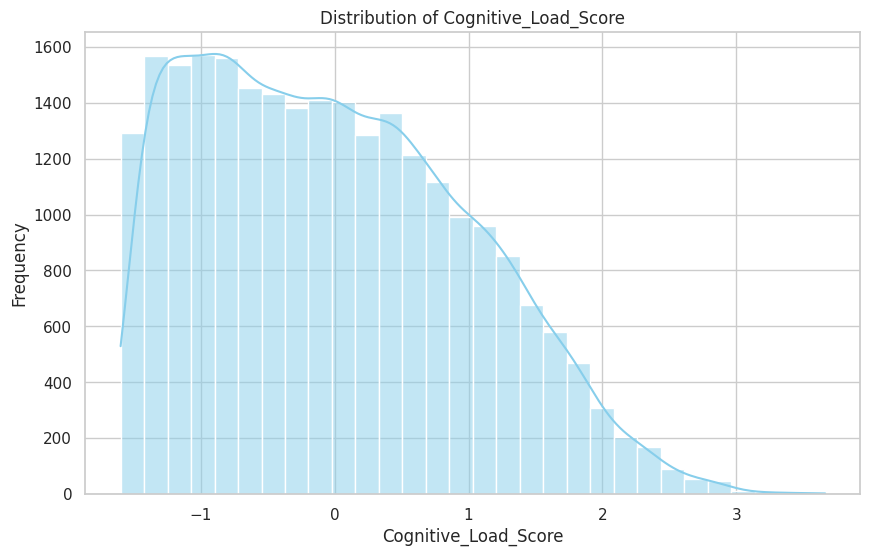

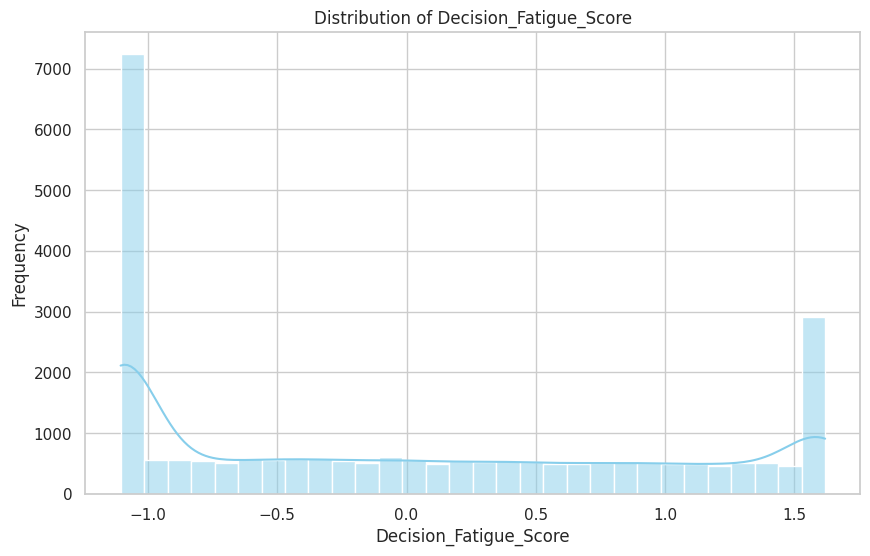

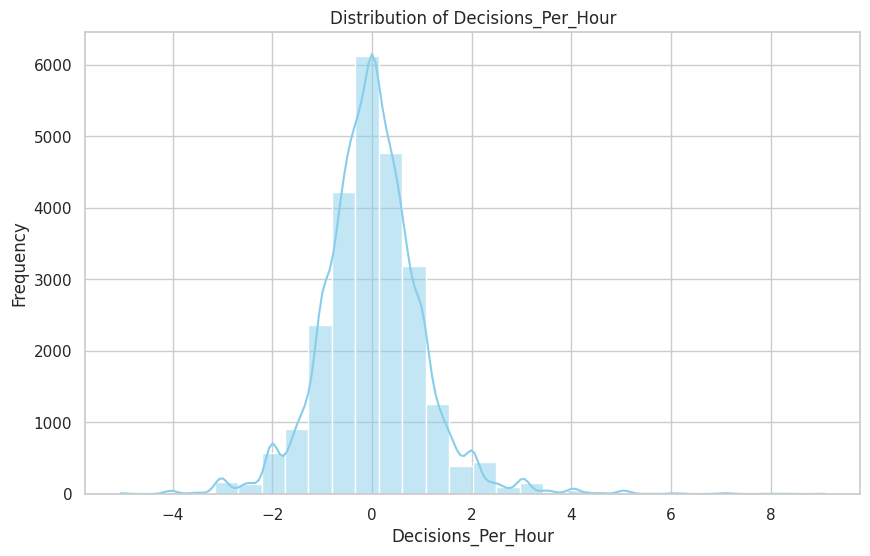

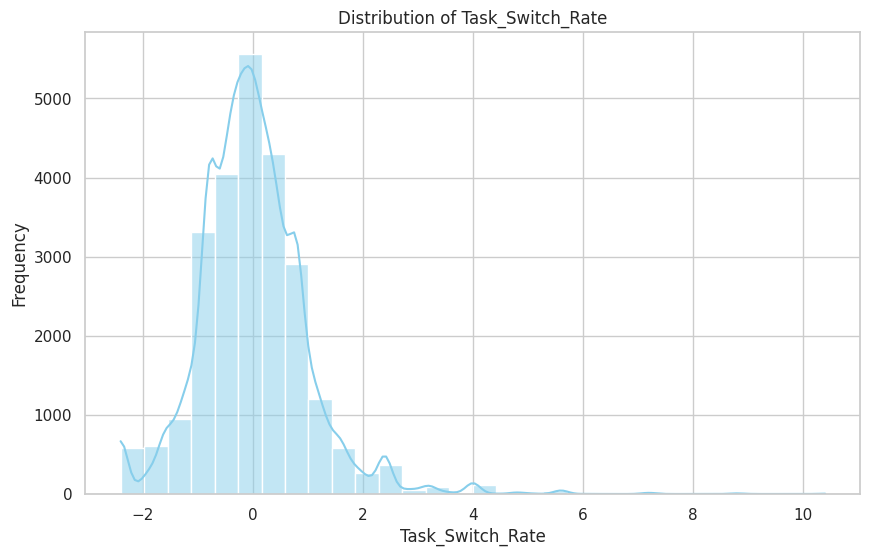

In [12]:
df = df_scaled.copy()

# Set a clean style for all plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Distribution of numeric features
numeric_cols = ['Hours_Awake', 'Decisions_Made', 'Task_Switches', 'Avg_Decision_Time_sec',
                'Sleep_Hours_Last_Night', 'Caffeine_Intake_Cups', 'Stress_Level_1_10',
                'Error_Rate', 'Cognitive_Load_Score', 'Decision_Fatigue_Score',
                'Decisions_Per_Hour', 'Task_Switch_Rate']

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

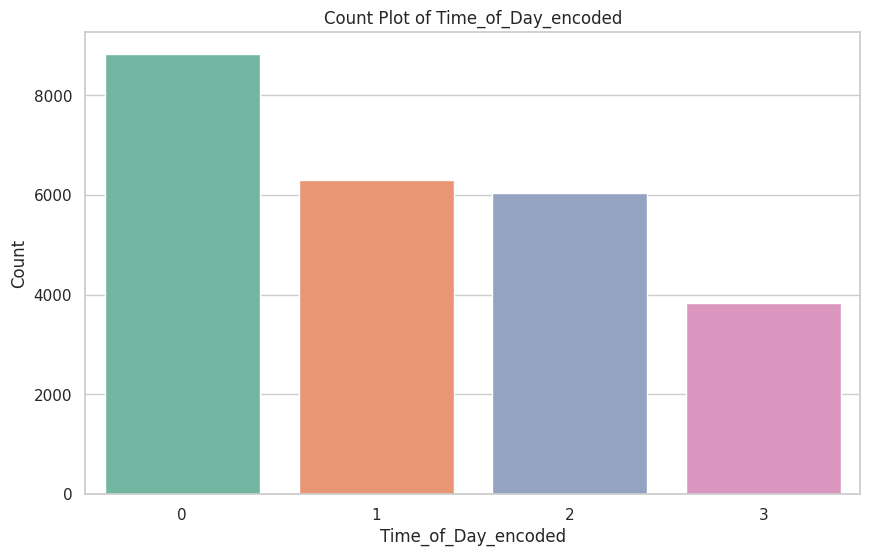

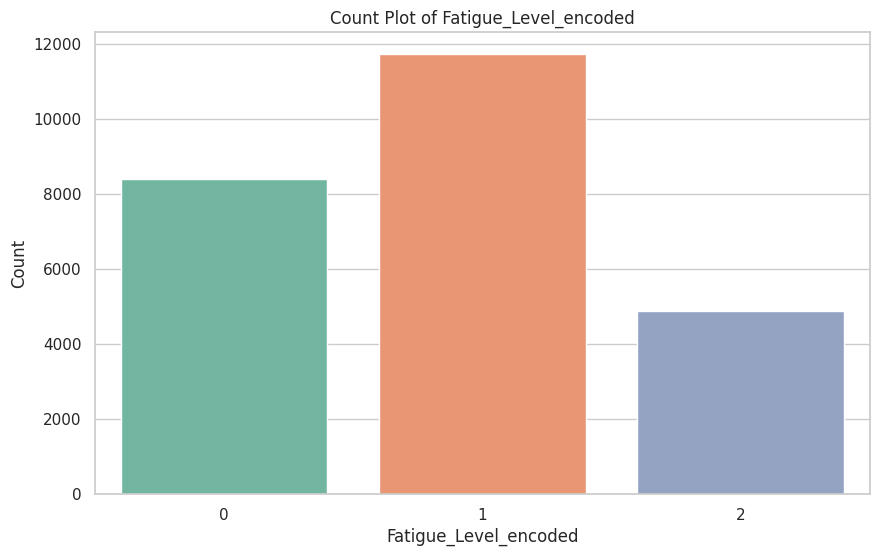

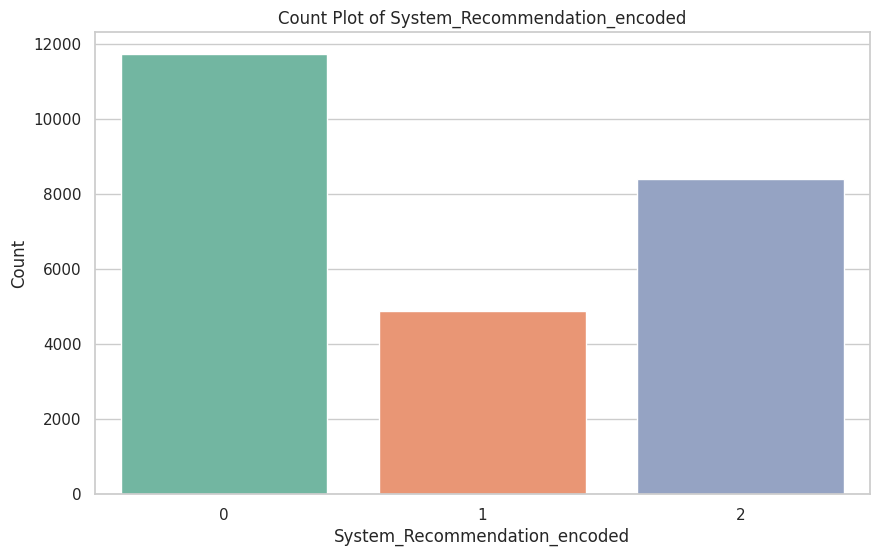

In [13]:
categorical_encoded_cols = ['Time_of_Day_encoded', 'Fatigue_Level_encoded', 'System_Recommendation_encoded']

for col in categorical_encoded_cols:
    plt.figure()
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

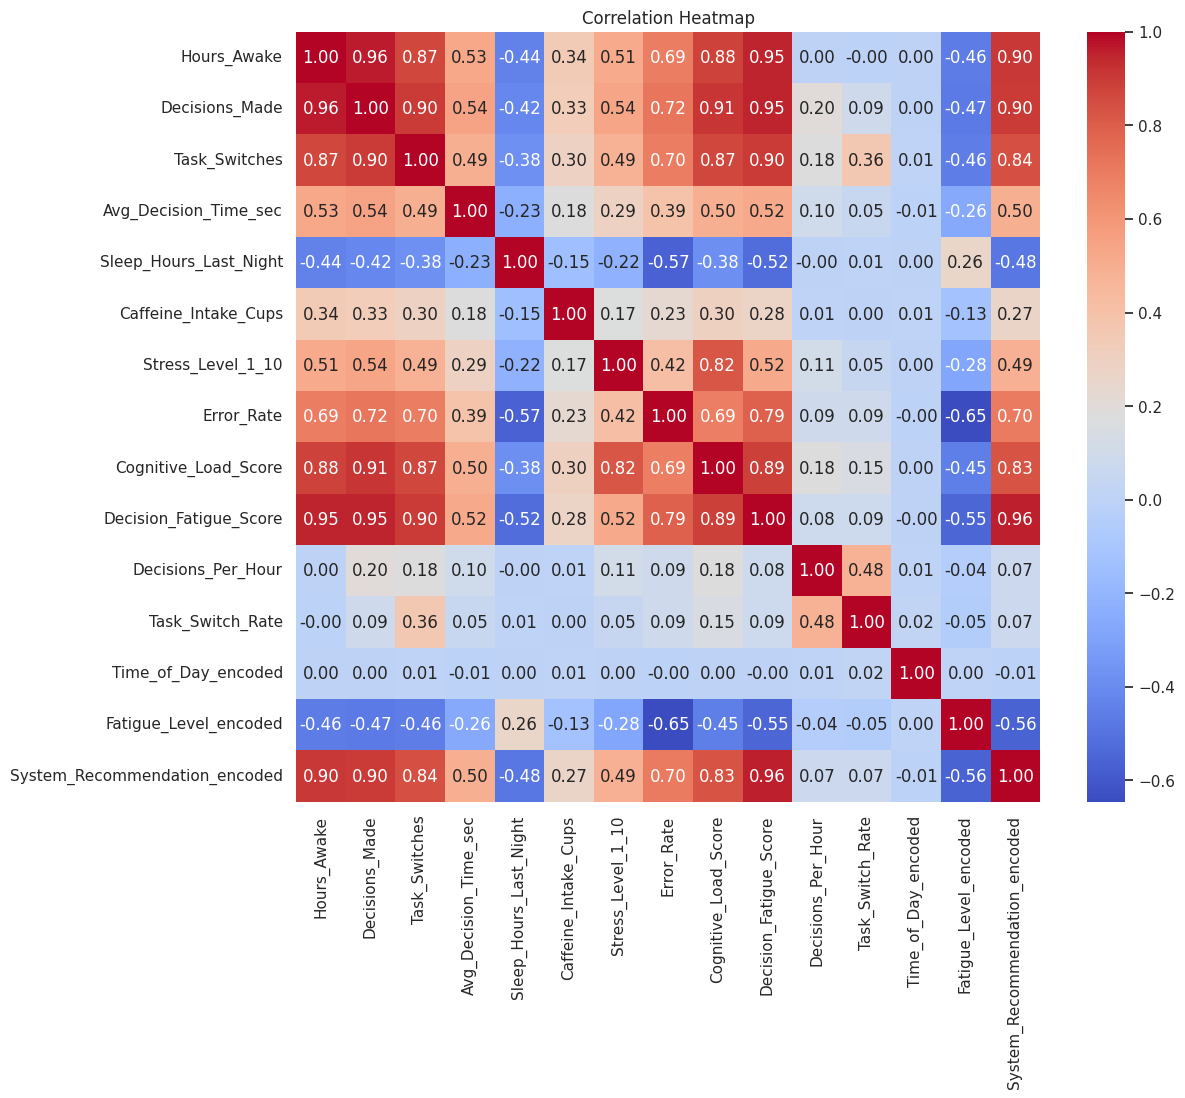

In [14]:
plt.figure(figsize=(12,10))
corr = df[numeric_cols + categorical_encoded_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

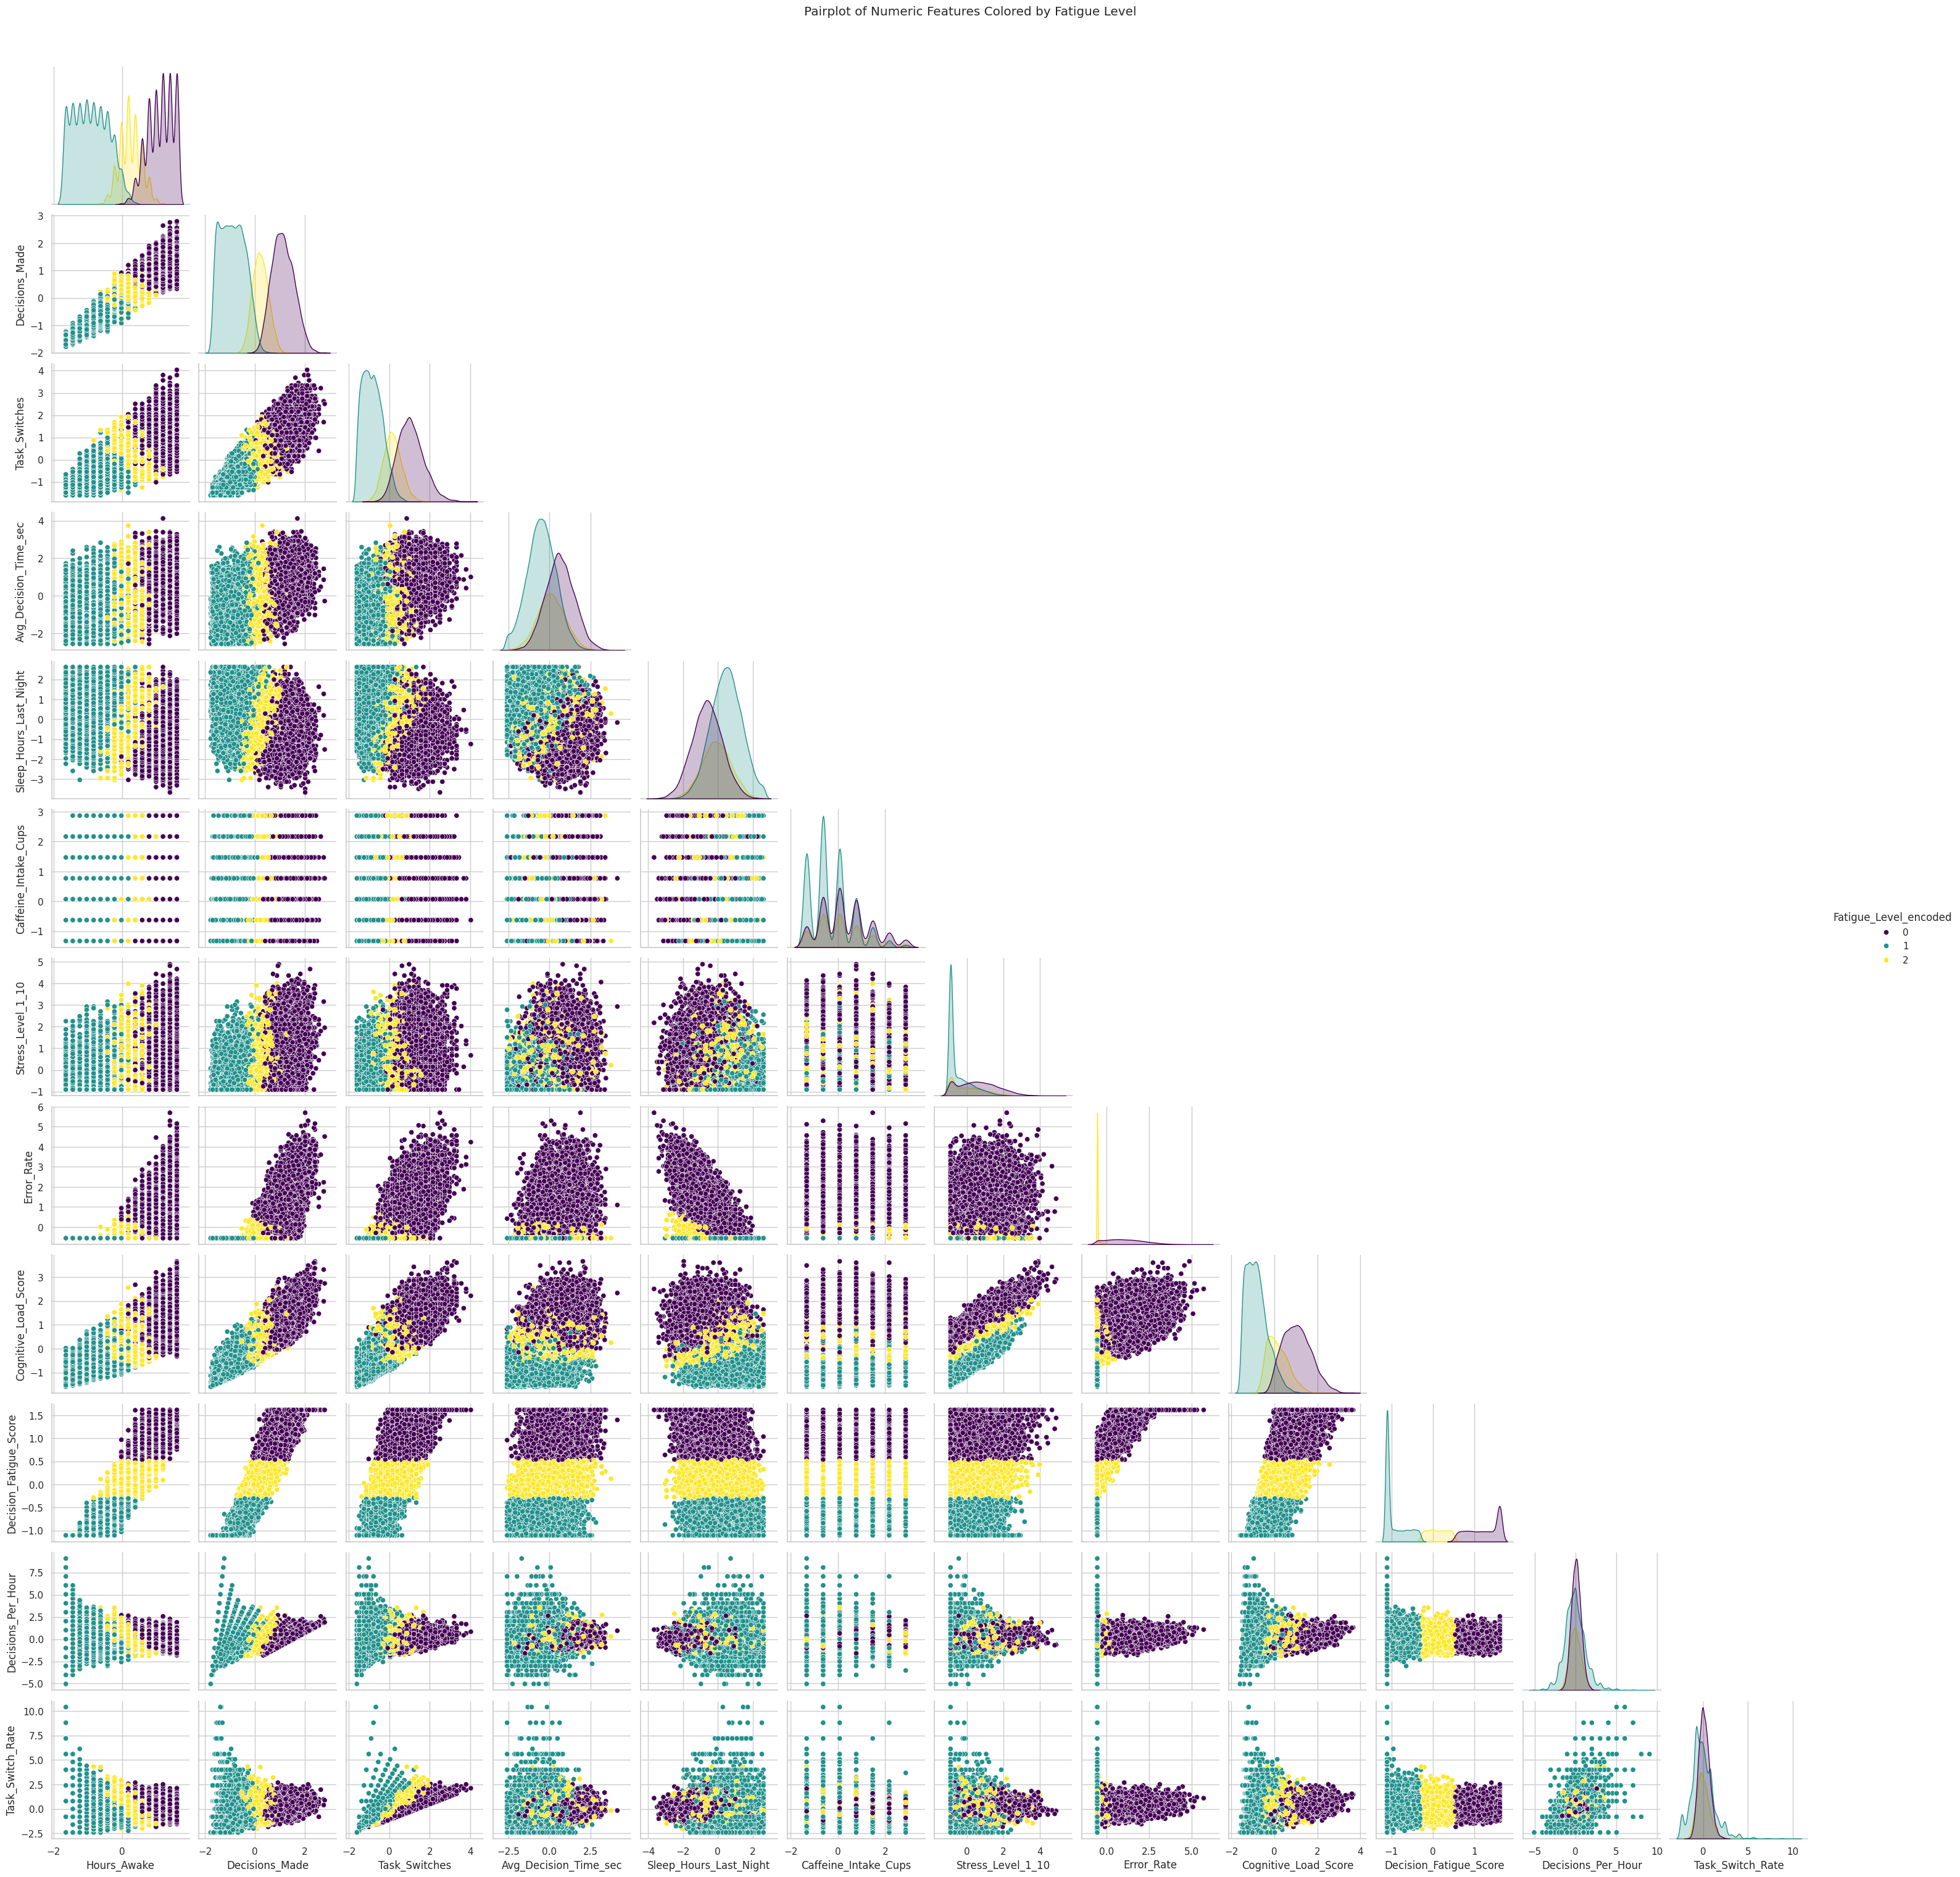

In [15]:
sns.pairplot(df, vars=numeric_cols, hue='Fatigue_Level_encoded', palette='viridis', corner=True)
plt.suptitle("Pairplot of Numeric Features Colored by Fatigue Level", y=1.02)
plt.show()

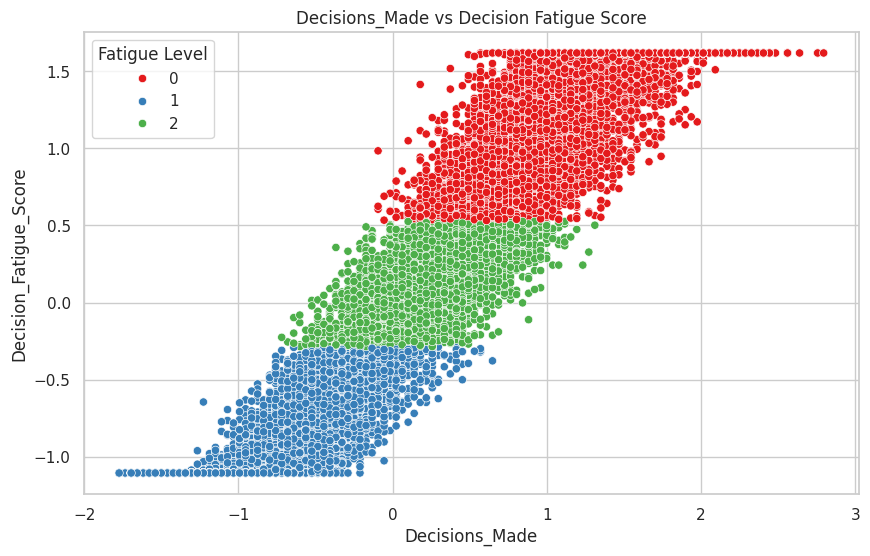

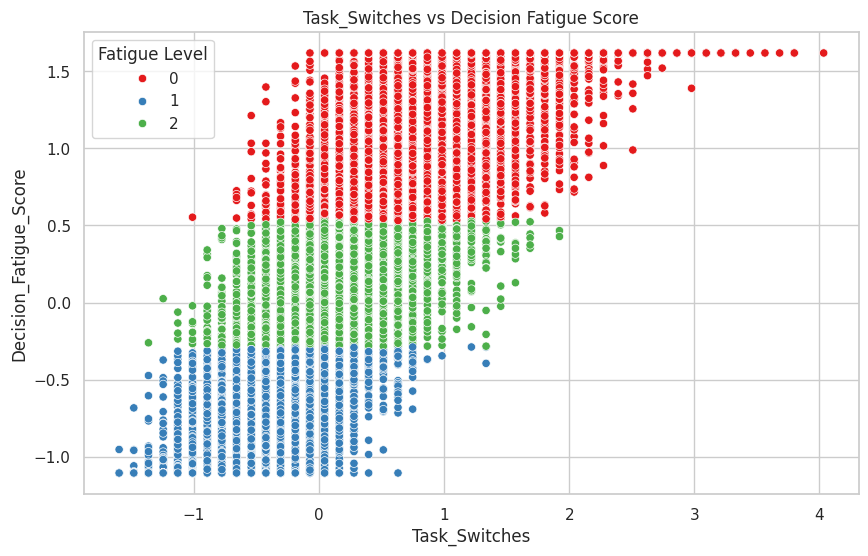

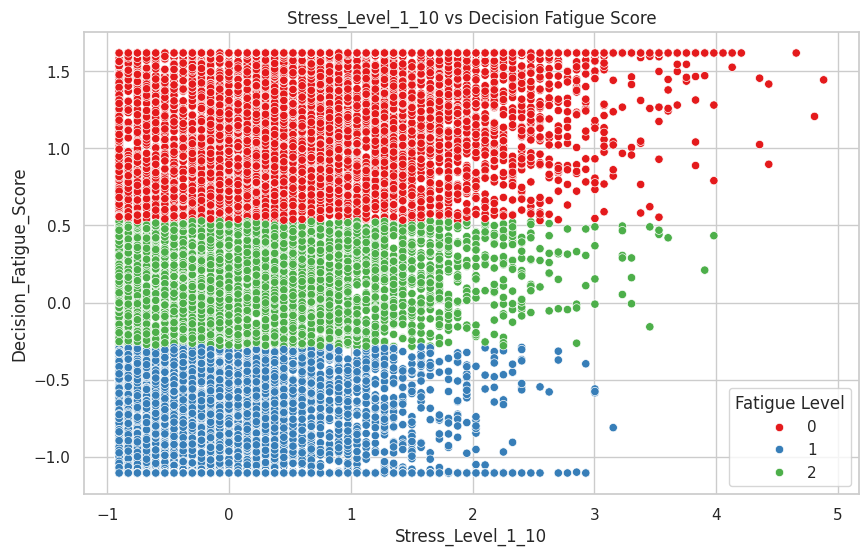

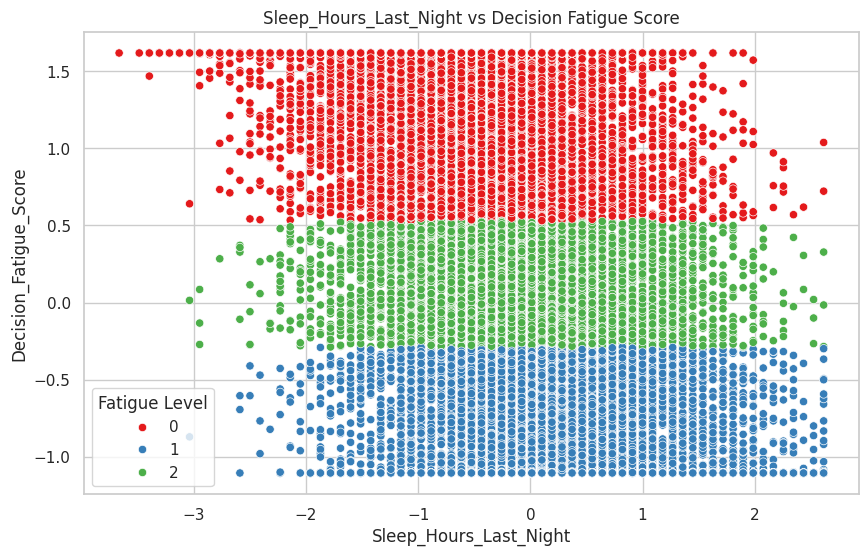

In [16]:
key_features = ['Decisions_Made', 'Task_Switches', 'Stress_Level_1_10', 'Sleep_Hours_Last_Night']
for col in key_features:
    plt.figure()
    sns.scatterplot(x=df[col], y=df['Decision_Fatigue_Score'], hue=df['Fatigue_Level_encoded'], palette='Set1')
    plt.title(f'{col} vs Decision Fatigue Score')
    plt.xlabel(col)
    plt.ylabel('Decision_Fatigue_Score')
    plt.legend(title='Fatigue Level')
    plt.show()

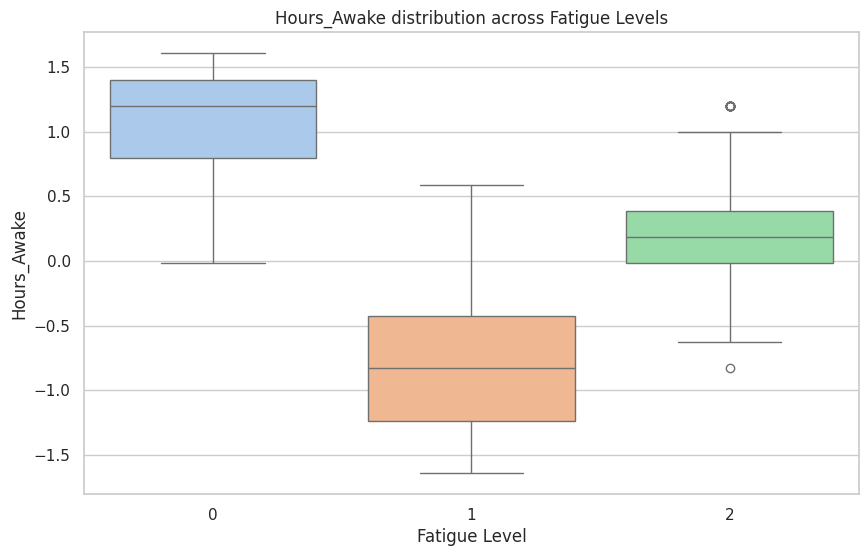

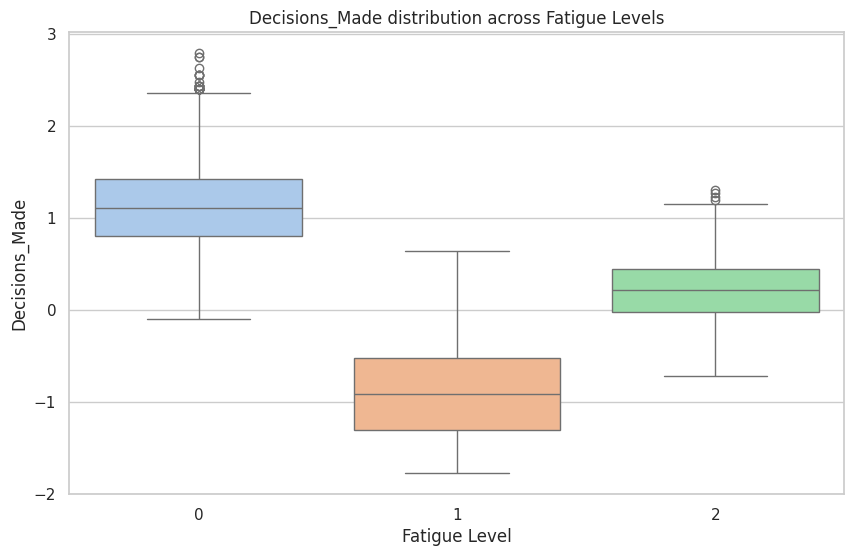

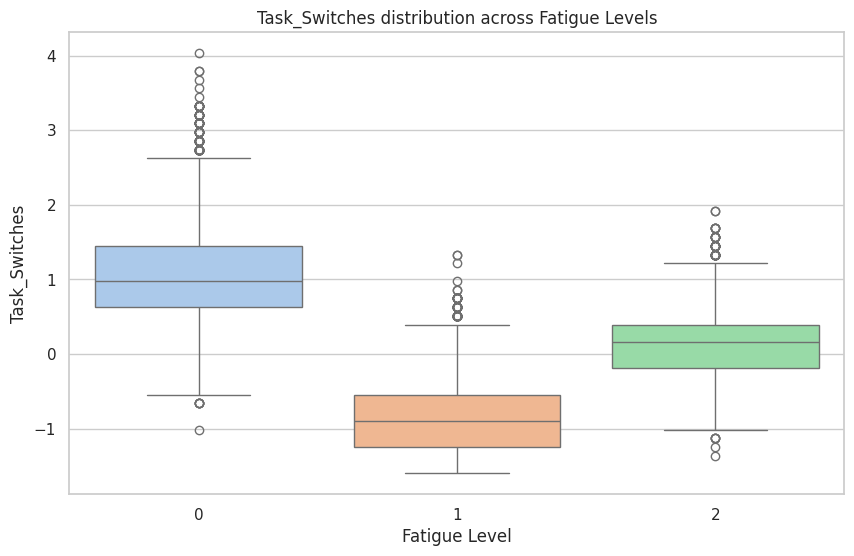

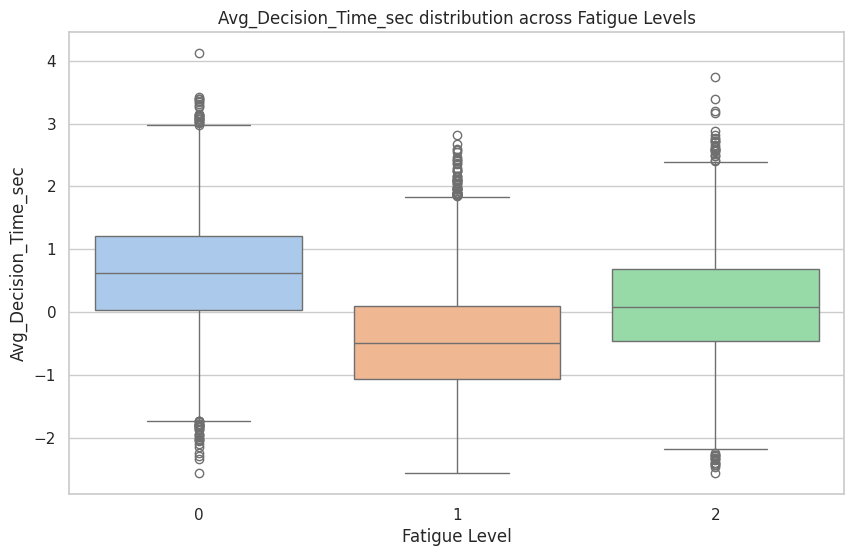

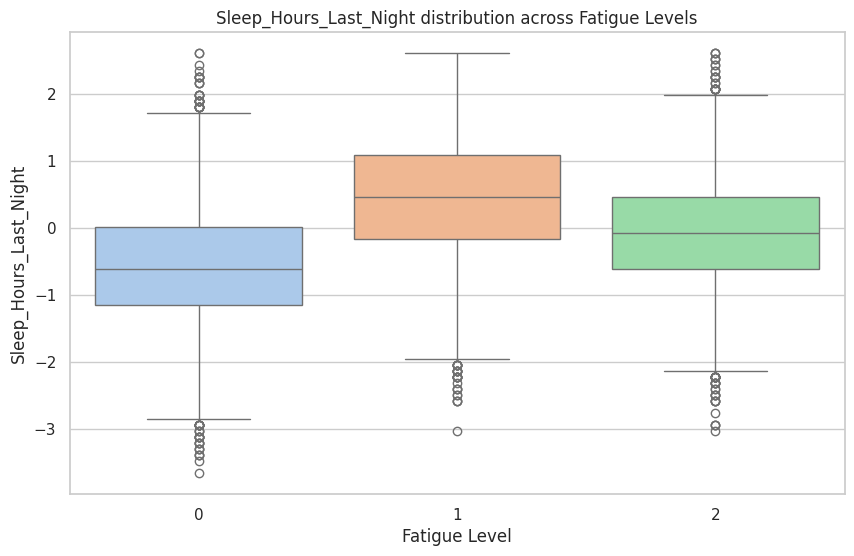

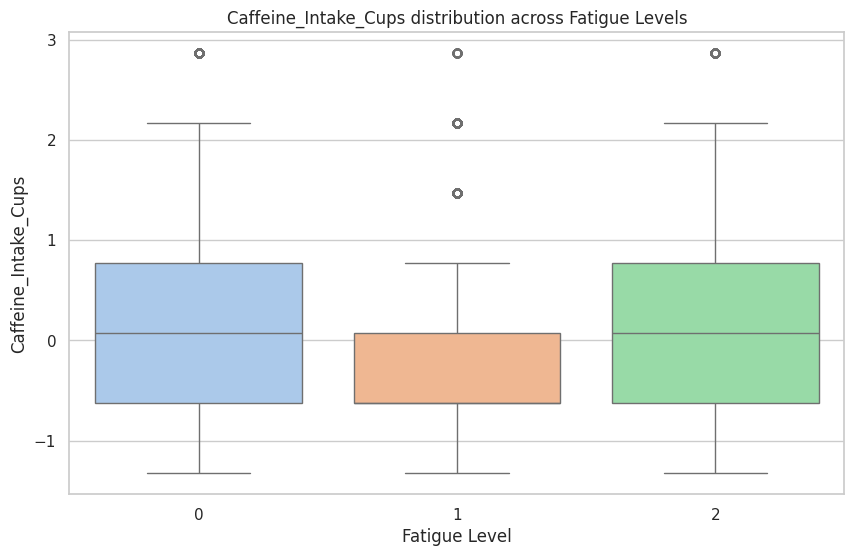

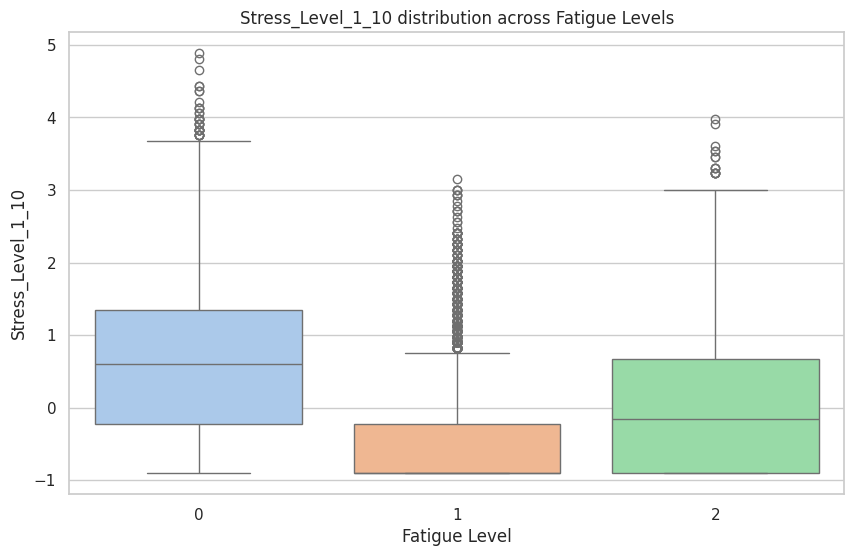

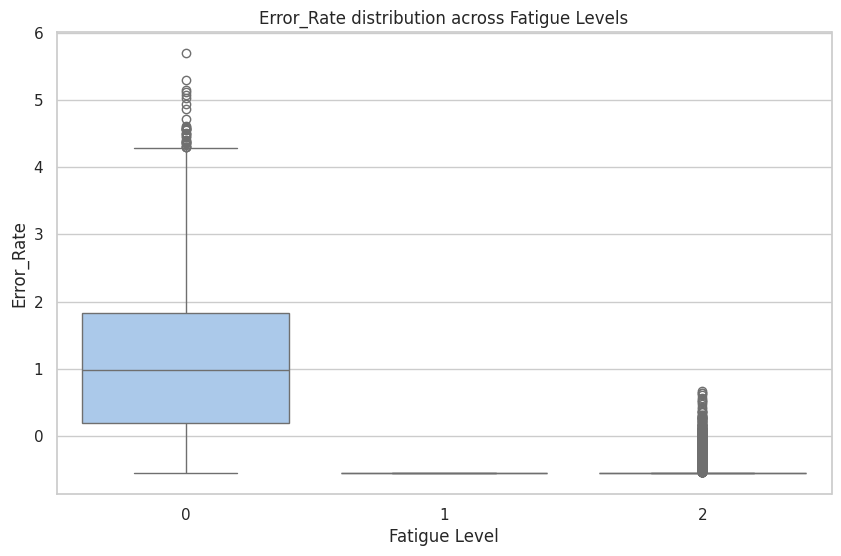

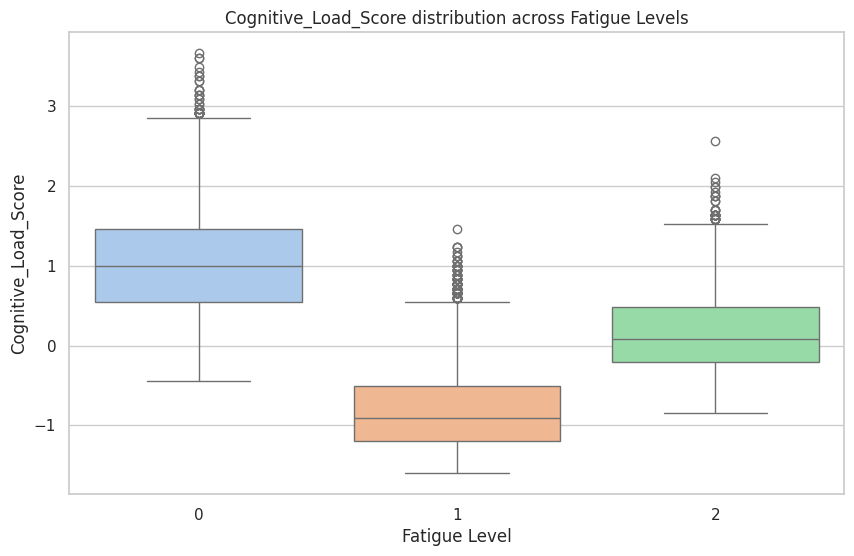

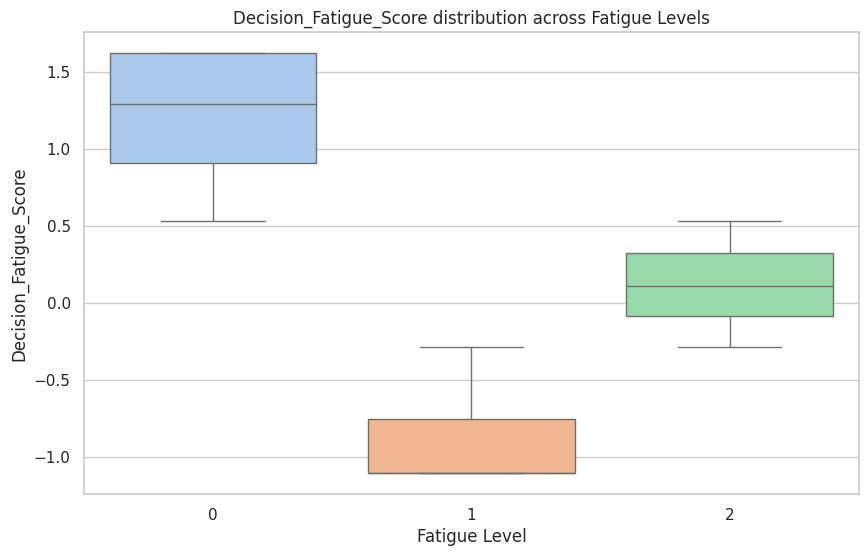

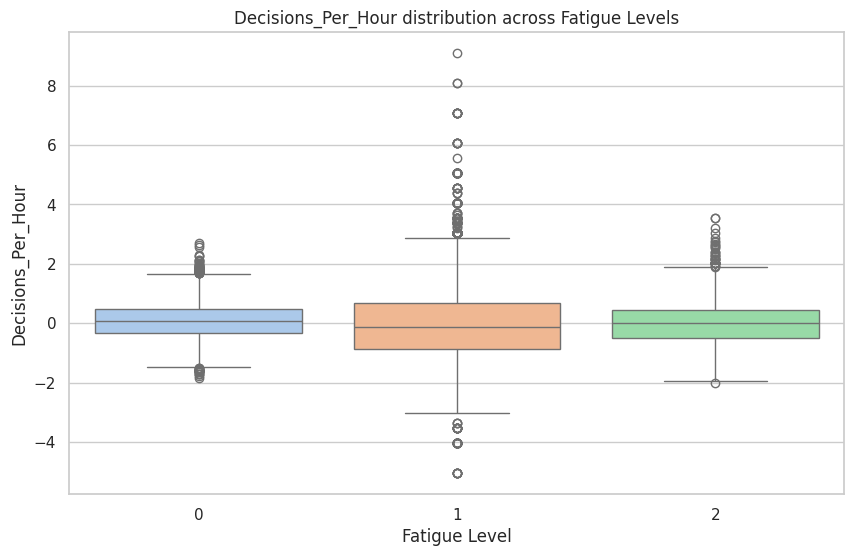

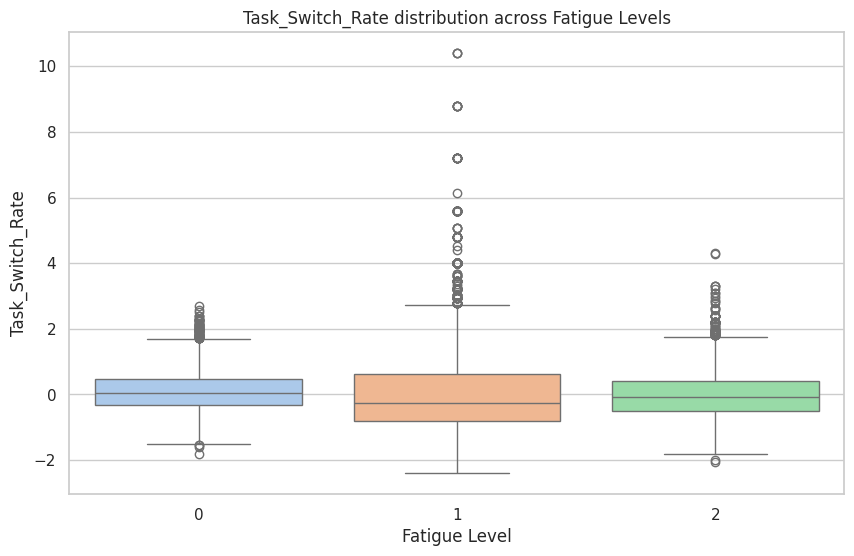

In [17]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df['Fatigue_Level_encoded'], y=df[col], palette='pastel')
    plt.title(f'{col} distribution across Fatigue Levels')
    plt.xlabel('Fatigue Level')
    plt.ylabel(col)
    plt.show()

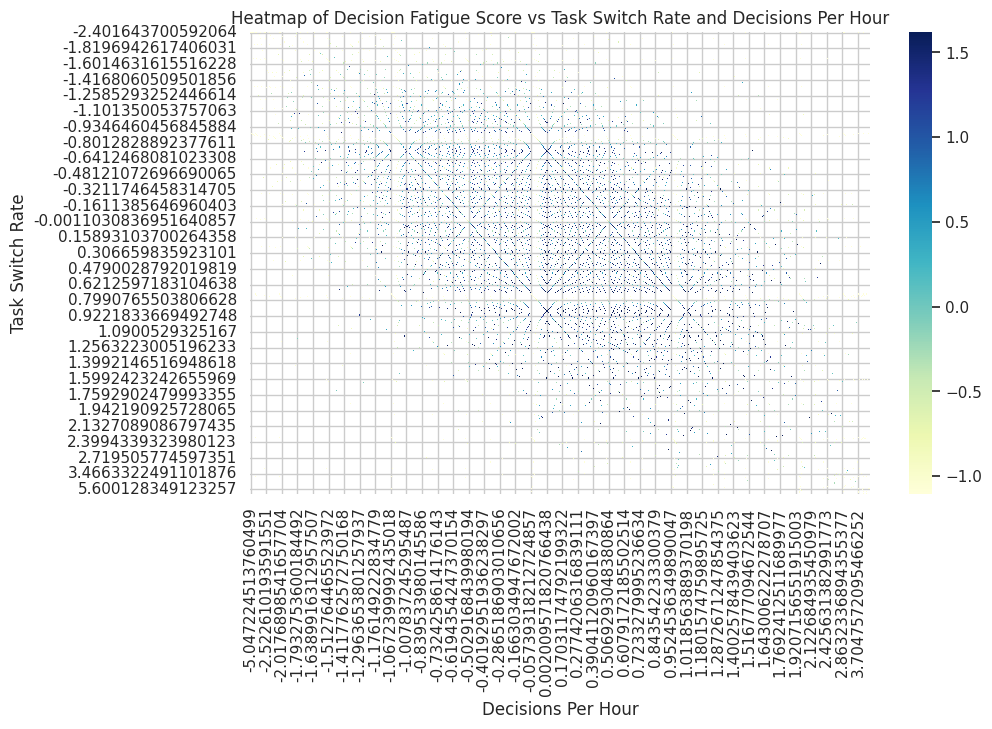

In [18]:
plt.figure(figsize=(10,6))
pivot_table = df.pivot_table(values='Decision_Fatigue_Score', 
                             index='Task_Switch_Rate', 
                             columns='Decisions_Per_Hour', 
                             aggfunc='mean')
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title("Heatmap of Decision Fatigue Score vs Task Switch Rate and Decisions Per Hour")
plt.xlabel("Decisions Per Hour")
plt.ylabel("Task Switch Rate")
plt.show()

## ML

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [20]:
# Columns to use
df = df[['Hours_Awake','Decisions_Made','Task_Switches','Avg_Decision_Time_sec',
         'Sleep_Hours_Last_Night','Time_of_Day','Caffeine_Intake_Cups','Stress_Level_1_10',
         'Error_Rate','Cognitive_Load_Score','Decision_Fatigue_Score','Fatigue_Level',
         'System_Recommendation']]

# Encode categorical columns
categorical_cols = ['Time_of_Day', 'Fatigue_Level', 'System_Recommendation']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col+'_encoded'] = le.fit_transform(df[col])
    le_dict[col] = le

# Features and target
X = df.drop(columns=['Fatigue_Level','Fatigue_Level_encoded','Time_of_Day','System_Recommendation'])
y = df['Fatigue_Level_encoded']

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train models and store accuracy
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100
    results.append({"Model": name, "Accuracy (%)": round(acc, 2)})
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       1.00      1.00      1.00       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Model: Support Vector Machine
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00      2346
           2       1.00      1.00      1.00       973

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1681
           1       1.00      1.00      1.00  

In [23]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy (%)", ascending=False)
print("\nSummary of Model Accuracies:")
print(results_df)


Summary of Model Accuracies:
                    Model  Accuracy (%)
0     Logistic Regression         100.0
1  Support Vector Machine         100.0
2     K-Nearest Neighbors         100.0
3           Decision Tree         100.0
4           Random Forest         100.0
5       Gradient Boosting         100.0
6             Naive Bayes         100.0


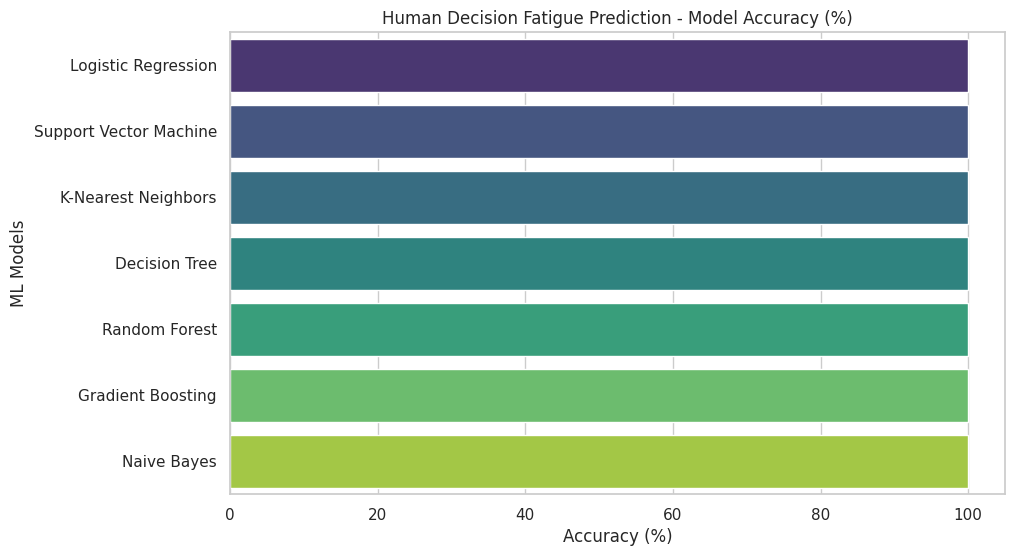

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x="Accuracy (%)", y="Model", data=results_df, palette="viridis")
plt.title("Human Decision Fatigue Prediction - Model Accuracy (%)")
plt.xlabel("Accuracy (%)")
plt.ylabel("ML Models")
plt.xlim(0, 105)
plt.show()

## Thank you...pls upvote!!!!